In [2]:
import pandas as pd

In [3]:
primary = pd.read_csv('API_primary.csv')
secondary = pd.read_csv('API_secondary.csv')
pmetadata = pd.read_csv('Metadata_primary.csv')
smetadata = pd.read_csv('Metadata_secondary.csv')

In [55]:
primarytotal = primary.merge(pmetadata,how='inner',on='Country Code')

In [7]:
secondarytotal = secondary.merge(smetadata,how='inner',on='Country Code')

In [9]:
primarytotal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    265 non-null    object 
 1   Country Code    265 non-null    object 
 2   Indicator Name  265 non-null    object 
 3   Indicator Code  265 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            46 non-null     float64
 15  1971            100 non-null    float64
 16  1972            104 non-null    float64
 17  1973            103 non-null    flo

In [52]:
primarytotalworld = primarytotal[primarytotal['Country Code'] == 'WLD']

In [53]:
primarytotalworld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 258 to 258
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    1 non-null      object 
 1   Country Code    1 non-null      object 
 2   Indicator Name  1 non-null      object 
 3   Indicator Code  1 non-null      object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            1 non-null      float64
 15  1971            1 non-null      float64
 16  1972            1 non-null      float64
 17  1973            1 non-null      flo

In [82]:
primaryworldtotal = primarytotal[primarytotal['Country Code'] == 'WLD']
list=[]
for i in range(2000,2021):
    list.append(primaryworld[f'{i}'])
    print(list)

print(type(list[1]))




[258    81.950203
Name: 2000, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.760117
Name: 2001, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.760117
Name: 2001, dtype: float64, 258    83.42852
Name: 2002, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.760117
Name: 2001, dtype: float64, 258    83.42852
Name: 2002, dtype: float64, 258    84.15937
Name: 2003, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.760117
Name: 2001, dtype: float64, 258    83.42852
Name: 2002, dtype: float64, 258    84.15937
Name: 2003, dtype: float64, 258    84.687218
Name: 2004, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.760117
Name: 2001, dtype: float64, 258    83.42852
Name: 2002, dtype: float64, 258    84.15937
Name: 2003, dtype: float64, 258    84.687218
Name: 2004, dtype: float64, 258    85.47123
Name: 2005, dtype: float64]
[258    81.950203
Name: 2000, dtype: float64, 258    82.7

In [17]:
print(type(list[1]))

<class 'pandas.core.series.Series'>


In [29]:
#created dataframe for list (change to object dataframe) series to dataframe

newlist=pd.DataFrame(list)
print(newlist)


            258
2000  81.950203
2001  82.760117
2002  83.428520
2003  84.159370
2004  84.687218
2005  85.471230
2006  85.940086
2007  86.905579
2008  88.458389
2009  89.154053
2010  88.920067
2011  88.501739
2012  89.244469
2013  89.302330
2014  89.052261
2015  88.715660
2016  88.904846
2017  89.162437
2018  89.407341
2019  89.630142
2020  90.140068


In [26]:
print(type(newlist))

<class 'pandas.core.frame.DataFrame'>


In [31]:
newlist.columns

Int64Index([258], dtype='int64')

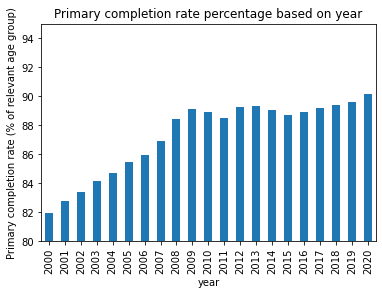

In [65]:
#Question 1

import matplotlib.pyplot as plt
ax=newlist.plot.bar()
plt.xlabel('year')
plt.ylabel('Primary completion rate (% of relevant age group)')
plt.ylim([80,95])     #y limit
plt.title('Primary completion rate percentage based on year')

ax.get_legend().remove()

In [79]:
#primarytotal is the merge
#show different income levels


pt50 = primarytotal.groupby('IncomeGroup')['2018'].describe().sort_values('50%')      #.sort_values('median'), sort_values only on dataframes
print(type(pt50))
ptmedian = pt50['50%']




<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'primary completion rate by income level')

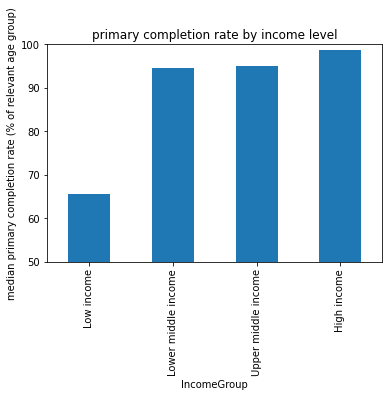

In [80]:
#Question 2
axpt=ptmedian.plot.bar()

plt.ylabel('median primary completion rate (% of relevant age group)')
plt.ylim([50,100])     #y limit
plt.title('primary completion rate by income level')

#ax.get_legend().remove()

In [77]:
st50 = secondarytotal.groupby('IncomeGroup')['2018'].describe().sort_values('50%')      #.sort_values('median'), sort_values only on dataframes
#print(st50)
print(type(st50))
stmedian = st50['50%']


<class 'pandas.core.frame.DataFrame'>


Text(0.5, 1.0, 'Secondary School Enrollment by income level')

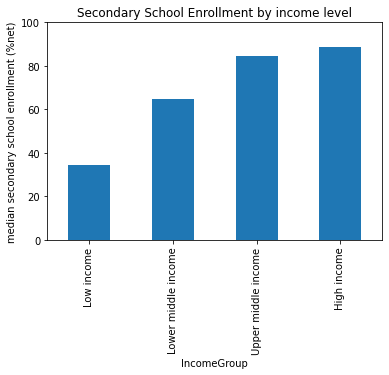

In [78]:
#Question 3
axst=stmedian.plot.bar()

plt.ylabel('median secondary school enrollment (%net)')
plt.ylim([0,100])     #y limit
plt.title('Secondary School Enrollment by income level')


In [87]:
psworldtotal = secondarytotal[secondarytotal['Country Code'] == 'WLD']
list2=[]
for i in range(2000,2019):
    list2.append(psworldtotal[f'{i}'])
    print(list2)

[258    54.93954
Name: 2000, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 2001, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 2001, dtype: float64, 258    56.06077
Name: 2002, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 2001, dtype: float64, 258    56.06077
Name: 2002, dtype: float64, 258    56.94918
Name: 2003, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 2001, dtype: float64, 258    56.06077
Name: 2002, dtype: float64, 258    56.94918
Name: 2003, dtype: float64, 258    57.81391
Name: 2004, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 2001, dtype: float64, 258    56.06077
Name: 2002, dtype: float64, 258    56.94918
Name: 2003, dtype: float64, 258    57.81391
Name: 2004, dtype: float64, 258    58.49775
Name: 2005, dtype: float64]
[258    54.93954
Name: 2000, dtype: float64, 258    55.54719
Name: 200

In [88]:
newlist2=pd.DataFrame(list2)     #Data frame version for the values by year
print(newlist2)


           258
2000  54.93954
2001  55.54719
2002  56.06077
2003  56.94918
2004  57.81391
2005  58.49775
2006  59.11553
2007  60.08915
2008  60.84241
2009  61.30970
2010  62.54485
2011  63.53369
2012  63.79482
2013  64.89960
2014  65.64805
2015  65.71337
2016  65.82859
2017  66.19644
2018  66.27183


In [93]:
newlist2.index

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018'],
      dtype='object')

In [95]:
newlist2['Year']=newlist2.index    #create newcolumn for the years
print(newlist2)

           258  Year
2000  54.93954  2000
2001  55.54719  2001
2002  56.06077  2002
2003  56.94918  2003
2004  57.81391  2004
2005  58.49775  2005
2006  59.11553  2006
2007  60.08915  2007
2008  60.84241  2008
2009  61.30970  2009
2010  62.54485  2010
2011  63.53369  2011
2012  63.79482  2012
2013  64.89960  2013
2014  65.64805  2014
2015  65.71337  2015
2016  65.82859  2016
2017  66.19644  2017
2018  66.27183  2018


In [96]:
newlist['Year']=newlist.index
print(newlist)

            258  Year
2000  81.950203  2000
2001  82.760117  2001
2002  83.428520  2002
2003  84.159370  2003
2004  84.687218  2004
2005  85.471230  2005
2006  85.940086  2006
2007  86.905579  2007
2008  88.458389  2008
2009  89.154053  2009
2010  88.920067  2010
2011  88.501739  2011
2012  89.244469  2012
2013  89.302330  2013
2014  89.052261  2014
2015  88.715660  2015
2016  88.904846  2016
2017  89.162437  2017
2018  89.407341  2018
2019  89.630142  2019
2020  90.140068  2020


In [101]:
thefinallist = newlist.merge(newlist2,how='inner',on='Year')
thefinallist.rename(columns={"258_x":"PrimaryCompletion","258_y":"SecondaryEnrollment"},inplace=True)
print(thefinallist)

    PrimaryCompletion  Year  SecondaryEnrollment
0           81.950203  2000             54.93954
1           82.760117  2001             55.54719
2           83.428520  2002             56.06077
3           84.159370  2003             56.94918
4           84.687218  2004             57.81391
5           85.471230  2005             58.49775
6           85.940086  2006             59.11553
7           86.905579  2007             60.08915
8           88.458389  2008             60.84241
9           89.154053  2009             61.30970
10          88.920067  2010             62.54485
11          88.501739  2011             63.53369
12          89.244469  2012             63.79482
13          89.302330  2013             64.89960
14          89.052261  2014             65.64805
15          88.715660  2015             65.71337
16          88.904846  2016             65.82859
17          89.162437  2017             66.19644
18          89.407341  2018             66.27183


In [104]:
theactualfinalfinallist = thefinallist[['PrimaryCompletion','SecondaryEnrollment']]
print(theactualfinalfinallist)

    PrimaryCompletion  SecondaryEnrollment
0           81.950203             54.93954
1           82.760117             55.54719
2           83.428520             56.06077
3           84.159370             56.94918
4           84.687218             57.81391
5           85.471230             58.49775
6           85.940086             59.11553
7           86.905579             60.08915
8           88.458389             60.84241
9           89.154053             61.30970
10          88.920067             62.54485
11          88.501739             63.53369
12          89.244469             63.79482
13          89.302330             64.89960
14          89.052261             65.64805
15          88.715660             65.71337
16          88.904846             65.82859
17          89.162437             66.19644
18          89.407341             66.27183


Text(0, 0.5, 'Secondary Enrollment (%net)')

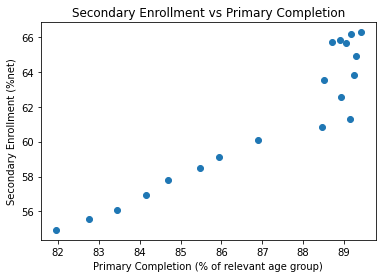

In [111]:
plt.scatter(theactualfinalfinallist['PrimaryCompletion'], theactualfinalfinallist['SecondaryEnrollment'])
plt.title('Secondary Enrollment vs Primary Completion')
plt.xlabel('Primary Completion (% of relevant age group)')
plt.ylabel('Secondary Enrollment (%net)')
